In [153]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.optimize import minimize
from scipy.stats import expon
from scipy.optimize import curve_fit

In [210]:
#Input is relative file pathname, returns the array of times between events
def file_to_deltas(filename, is_delta=True):
    file = open(filename, "r")
    data = [float(i.rstrip()) for i in file]
    if is_delta:
        return [i for i in data if i > 0.0015]
    deltas =[data[i] - data[i-1] for i in range (1, len(data))]
    return [i for i in deltas if i > 0.0015]

In [178]:
#def prob(x, r):
    #return r * np.exp(-1 * r * x)

#def dist_unprob(r, ds):
    #return 1 - np.prod(prob(np.array(ds), r))

#Input is array of times between events, returns the expected counts per second and error
#If the input does indeed follow an exponential distribution, the output should be close to the input's average
def rate(ds):
    #return minimize(dist_unprob, 1/np.average(ds), args=(ds, ), bounds=((0, None), )).x[0]
    r = 1 / expon.fit(ds, floc=0, scale=np.average(ds))[1]
    return r, r / (len(ds) ** 0.5)

def linreg(x, A, B):
    return A + (B * x)

def inverse_square(x, A):
    return A / (x ** 2)

In [211]:
d_background = rate(file_to_deltas("count_times_2024-05-24 160204.538705_background_180s.txt", False))
print(d_background)
a_background = rate(file_to_deltas("count_times_2024-05-30 130159.261421_background_180s.txt", False))
print(a_background)

(0.4000492327255741, 0.0471462542114548)
(0.3250323143764549, 0.04267883376491221)


[4.5238219456592725, 1.5345907564564532, 0.8134490992708703, 0.3500281595880537, 0.045895240978096385]
87.14856943312493 -1.788560154612867


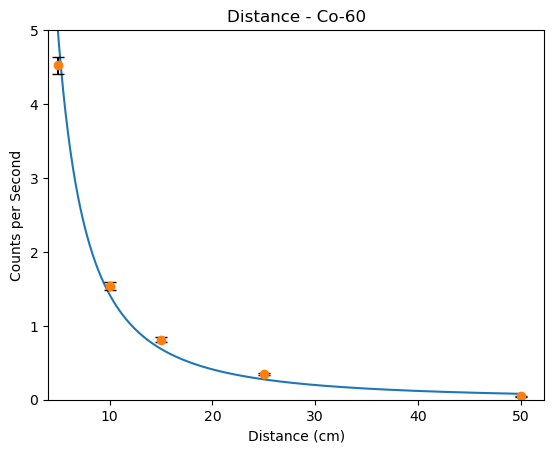

In [235]:
#Co60 Distance

d_Co_folder = "Co60 Distance 2024May24/"

d_Co = [5, 10, 15, 25, 50] #cm

d_Co_rate = np.array([rate(file_to_deltas(d_Co_folder + "count_times_2024-05-24 165050.592981_Co60_5cm_ish.txt", False)), 
                      rate(file_to_deltas(d_Co_folder + "count_times_2024-05-24 163254.035852_Co60_10cm.txt", False)), 
                      rate(file_to_deltas(d_Co_folder + "count_times_2024-05-24 163720.962434_Co60_15cm.txt", False)), 
                      rate(file_to_deltas(d_Co_folder + "count_times_2024-05-24 164107.980171_Co60_25cm.txt", False)), 
                      rate(file_to_deltas(d_Co_folder + "count_times_2024-05-24 164502.735197_Co60_50cm.txt", False))]) - d_background
print([i[0] for i in d_Co_rate])

Co_A, Co_B = curve_fit(linreg, np.log(d_Co), np.log([i[0] for i in d_Co_rate]), sigma=np.divide([i[1] for i in d_Co_rate], [i[0] for i in d_Co_rate]))[0]
print(np.e ** Co_A, Co_B)

d_x = np.linspace(4, 50, 1000)
plt.plot(d_x, (np.e ** Co_A) * (np.array(d_x) ** Co_B))
plt.errorbar(d_Co, [i[0] for i in d_Co_rate], yerr=[i[1] for i in d_Co_rate], fmt='o', ecolor='black', capsize=4)
plt.xlim(left=4)
plt.ylim(bottom=0, top=5)
plt.title("Distance - Co-60")
plt.xlabel("Distance (cm)")
plt.ylabel("Counts per Second")
plt.savefig("Plots/Co60Distance")
plt.show()

[14.060350878209368, 6.869751312138763, 1.846245631711347, 0.7155840600098085]
1268.0515075887683 -1.9531141731943662


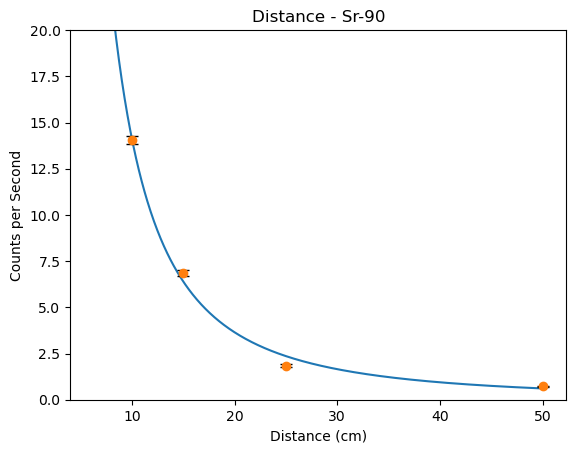

In [234]:
#Sr90 Distance

d_Sr_folder = "Sr90 Distance 2024May24/"

d_Sr = [10, 15, 25, 50] #cm

d_Sr_rate = np.array([rate(file_to_deltas(d_Sr_folder + "count_times_2024-05-24 161144.984493_Sr90_10cm.txt", False)), 
             rate(file_to_deltas(d_Sr_folder + "count_times_2024-05-24 162404.319393_Sr90_15cm.txt", False)), 
             rate(file_to_deltas(d_Sr_folder + "count_times_2024-05-24 161840.044053_Sr90_25cm.txt", False)), 
             rate(file_to_deltas(d_Sr_folder + "count_times_2024-05-24 162801.264830_Sr90_50cm.txt", False))]) - d_background
print([i[0] for i in d_Sr_rate])

Sr_A, Sr_B = curve_fit(linreg, np.log(d_Sr), np.log([i[0] for i in d_Sr_rate]), sigma=np.divide([i[1] for i in d_Sr_rate], [i[0] for i in d_Sr_rate]))[0]
print(np.e ** Sr_A, Sr_B)

plt.plot(d_x, (np.e ** Sr_A) * (np.array(d_x) ** Sr_B))
plt.errorbar(d_Sr, [i[0] for i in d_Sr_rate], yerr=[i[1] for i in d_Sr_rate], fmt='o', ecolor='black', capsize=4)
plt.xlim(left=4)
plt.ylim(bottom=0, top=20)
plt.title("Distance - Sr-90")
plt.xlabel("Distance (cm)")
plt.ylabel("Counts per Second")
plt.savefig("Plots/Sr90Distance")
plt.show()

In [117]:
a = np.array([1, 2, 3])

#Material widths, in cm
Althick = 0.083
Al = 0.031

[1.4879968607333107, 1.5784520387046872, 1.6392860581843347]
[1.676744551737769, 1.72971937665642, 1.3482619361577275]


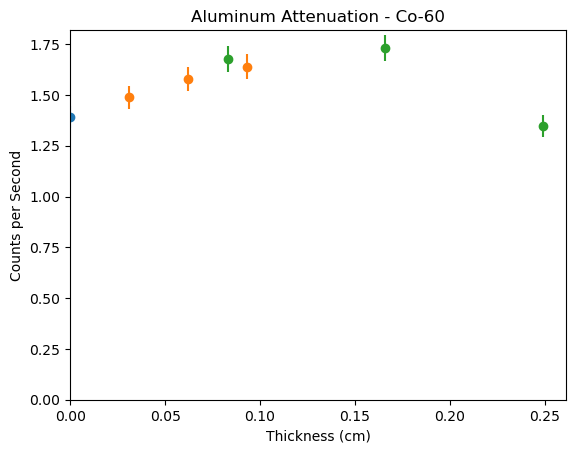

In [214]:
#Co60 Attenuation

a_Co_folder = "Co60 Attenuation 2024May30/"

a_Co_0 = np.array(rate(file_to_deltas(a_Co_folder + "count_times_2024-05-30 131319.641203_Co60_10cm.txt", False))) - a_background

a_Co_Al = np.array([rate(file_to_deltas(a_Co_folder + "count_times_2024-05-30 133215.120643_Co60_aluminum_1.txt", False)), 
           rate(file_to_deltas(a_Co_folder + "count_times_2024-05-30 133627.512943_Co60_aluminum_2.txt", False)), 
           rate(file_to_deltas(a_Co_folder + "count_times_2024-05-30 134033.965435_Co60_aluminum_3.txt", False))]) - a_background
print([i[0] for i in a_Co_Al])
a_Co_Althick = np.array([rate(file_to_deltas(a_Co_folder + "count_times_2024-05-30 131822.771290_Co60_thickaluminum_1.txt", False)), 
                rate(file_to_deltas(a_Co_folder + "count_times_2024-05-30 132239.019614_Co60_thickaluminum_2.txt", False)), 
                rate(file_to_deltas(a_Co_folder + "count_times_2024-05-30 132646.565044_Co60_thickaluminum_3.txt", False))]) - a_background
print([i[0] for i in a_Co_Althick])
plt.errorbar(0, a_Co_0[0], yerr=a_Co_0[1], fmt='o')
plt.errorbar(Al * a, [i[0] for i in a_Co_Al], yerr=[i[1] for i in a_Co_Al], fmt='o')
plt.errorbar(Althick * a, [i[0] for i in a_Co_Althick], yerr=[i[1] for i in a_Co_Althick], fmt='o')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title("Aluminum Attenuation - Co-60")
plt.xlabel("Thickness (cm)")
plt.ylabel("Counts per Second")
plt.show()

In [219]:
a_Co_Al = 1 / np.array([np.average(file_to_deltas(a_Co_folder + "count_times_2024-05-30 133215.120643_Co60_aluminum_1.txt", False)), 
           np.average(file_to_deltas(a_Co_folder + "count_times_2024-05-30 133627.512943_Co60_aluminum_2.txt", False)), 
           np.average(file_to_deltas(a_Co_folder + "count_times_2024-05-30 134033.965435_Co60_aluminum_3.txt", False))]) - a_background[0]
print(a_Co_Al)

[1.48799686 1.57845204 1.63928606]


[12.491494224933383, 9.049600734511971, 6.2779662919085055]
[7.397343497320244, 2.0481607386613123, 0.3639934303370173]


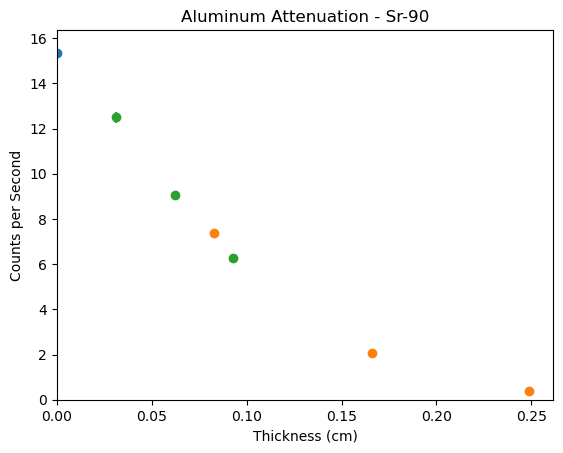

In [215]:
#Sr90 Attenuation

a_Sr_folder = "Sr90 Attenuation 2024May30/"

a_Sr_0 = np.array(rate(file_to_deltas(a_Sr_folder + "count_times_2024-05-30 143822.914168_Sr90_10cm.txt", False))) - a_background

a_Sr_Al = np.array([rate(file_to_deltas(a_Sr_folder + "count_times_2024-05-30 144214.435176_Sr90_aluminum_1.txt", False)), 
           rate(file_to_deltas(a_Sr_folder + "count_times_2024-05-30 144645.494110_Sr90_aluminum_2.txt", False)), 
           rate(file_to_deltas(a_Sr_folder + "count_times_2024-05-30 145024.281947_Sr90_aluminum_3.txt", False))]) - a_background
print([i[0] for i in a_Sr_Al])
a_Sr_Althick = np.array([rate(file_to_deltas(a_Sr_folder + "count_times_2024-05-30 142649.888454_Sr90_thickaluminum_1.txt", False)), 
                rate(file_to_deltas(a_Sr_folder + "count_times_2024-05-30 143039.008414_Sr90_thickaluminum_2.txt", False)), 
                rate(file_to_deltas(a_Sr_folder + "count_times_2024-05-30 143439.109562_Sr90_thickaluminum_3.txt", False))]) - a_background
print([i[0] for i in a_Sr_Althick])
plt.errorbar(0, a_Sr_0[0], yerr=a_Sr_0[1], fmt='o')
plt.errorbar(Althick * a, [i[0] for i in a_Sr_Althick], yerr=[i[1] for i in a_Sr_Althick], fmt='o')
plt.errorbar(Al * a, [i[0] for i in a_Sr_Al], yerr=[i[1] for i in a_Sr_Al], fmt='o')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title("Aluminum Attenuation - Sr-90")
plt.xlabel("Thickness (cm)")
plt.ylabel("Counts per Second")
plt.show()

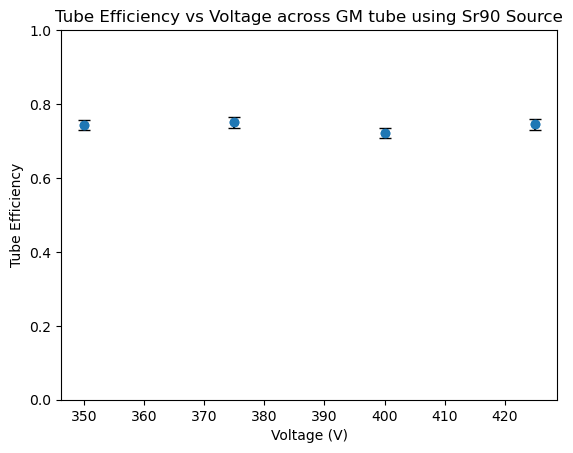

In [233]:
#Tube Efficiency

sr90_350V_data = file_to_deltas("Tube Efficiency 2024May31/count_times_2024-05-31 164716.535960_Sr90_10cm_350V.txt", False)
sr90_375V_data = file_to_deltas("Tube Efficiency 2024May31/count_times_2024-05-31 165209.379720_Sr90_10cm_375V.txt", False)
sr90_400V_data = file_to_deltas("Tube Efficiency 2024May31/count_times_2024-05-31 165613.097236_Sr90_10cm_400V.txt", False)
sr90_425V_data = file_to_deltas("Tube Efficiency 2024May31/count_times_2024-05-31 170046.166304_Sr90_10cm_425V.txt", False)

expected_count_rate = 20.4
te_350V = (rate(sr90_350V_data)[0] - a_background[0]) / expected_count_rate
te_375V = (rate(sr90_375V_data)[0] - a_background[0]) / expected_count_rate
te_400V = (rate(sr90_400V_data)[0] - a_background[0]) / expected_count_rate
te_425V = (rate(sr90_425V_data)[0] - a_background[0]) / expected_count_rate

y_err = [rate(sr90_350V_data)[1] / expected_count_rate, rate(sr90_375V_data)[1]/expected_count_rate, rate(sr90_400V_data)[1]/expected_count_rate, rate(sr90_425V_data)[1]/expected_count_rate]
 
voltages = [350, 375, 400, 425]
tube_efficiencies = [te_350V, te_375V, te_400V, te_425V]

plt.ylim(0, 1.0)
plt.scatter(voltages, tube_efficiencies)
plt.title("Tube Efficiency vs Voltage across GM tube using Sr90 Source")
plt.xlabel("Voltage (V)")
plt.ylabel("Tube Efficiency")
plt.errorbar(voltages, tube_efficiencies, yerr = y_err, fmt ='o', ecolor='black', capsize=4)
plt.savefig("Plots/TubeEfficiency.png", dpi=1080, bbox_inches="tight")
plt.show()